# MNIST Introduction

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = "cuda" if torch.cuda.is_available() else "cpu"

# reproducibility
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [2]:
mnist_train = dsets.MNIST(root="../datasets/MNIST_data/",
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root="../datasets/MNIST_data/",
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [3]:
batch_size = 100
n_epochs = 15

In [4]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [5]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [6]:
for epoch in range(1, n_epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)
    
    for x_train, y_train in data_loader:
        x_train = x_train.view(-1, 28*28).to(device)
        y_train = y_train.to(device)
        
        optimizer.zero_grad()
        prediction = linear(x_train)
        loss = criterion(prediction, y_train)
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
        
    print("Epoch {:04d}/{}, Loss: {:.9f}".format(
        epoch, n_epochs, loss))

Epoch 0001/15, Loss: 0.232610658
Epoch 0002/15, Loss: 0.428264171
Epoch 0003/15, Loss: 0.317135781
Epoch 0004/15, Loss: 0.342493773
Epoch 0005/15, Loss: 0.406500101
Epoch 0006/15, Loss: 0.378798246
Epoch 0007/15, Loss: 0.183160737
Epoch 0008/15, Loss: 0.262822151
Epoch 0009/15, Loss: 0.496193081
Epoch 0010/15, Loss: 0.295151740
Epoch 0011/15, Loss: 0.215840414
Epoch 0012/15, Loss: 0.231851324
Epoch 0013/15, Loss: 0.293769449
Epoch 0014/15, Loss: 0.290063888
Epoch 0015/15, Loss: 0.289636850


Accuracy:  0.8862999677658081
Label:  8
Prediction:  3


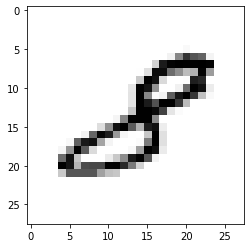

In [7]:
import matplotlib.pyplot as plt

# Gradient 사용 X (Test할 때는 이거 써주기)
with torch.no_grad():
    x_test = mnist_test.data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.targets.to(device)
    
    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())
    
    r = random.randint(0, len(mnist_test)-1)
    x_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data = mnist_test.targets[r:r+1].to(device)
    
    print("Label: ", y_single_data.item())
    single_prediction = linear(x_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.data[r:r+1].view(28, 28), cmap='Greys',
               interpolation='nearest')
    plt.show()